In [1]:
import pandas as pd
import numpy as np

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pylab as plt

pd.set_option('display.max_columns', 25)


# ------ Define functions ------
def run_kmeans(n_clusters_f, init_f, df_f):
    
    ##### Complete this function
    # This function should at least take a dataframe as an argument. I have suggested additional arguments you may
    # want to provide, but these can be changed as you need to fit your solution.
    # The output of this function should be the input data frame will the model object KMeans and a data summary. The
    # function will need to add an additional column to the input dataframe called 'predict_cluster_kmeans'
    # that contains the cluster labels assigned by the algorithm.

    k_means_model_f = KMeans(n_clusters=n_clusters_f,init=init_f).fit(df_f)
    df_f['predict_cluster_kmeans'] = k_means_model_f.labels_
    df_f['predict_cluster_kmeans'] = df_f['predict_cluster_kmeans'].astype(int)

    # summarize cluster attributes
    k_means_model_f_summary = df_f.groupby('predict_cluster_kmeans').agg(attribute_summary_method_dict)
    return k_means_model_f, k_means_model_f_summary

In [2]:
# ------ Import data ------

df = pd.read_csv('final data.csv').fillna(0)

In [3]:
df['tier'] = df['tier'].astype(str)
df['payment_period'] = df['payment_period'].astype(str)
categorical_columns= df[['payment_period','tier','preferred_genre','intended_use','male_TF','attribution_survey','attribution_technical','package_type','current_sub_TF']]
dum_df = pd.get_dummies(categorical_columns)
pd.set_option('display.max_columns', None)
dum_df

,payment_period_0,payment_period_1,payment_period_2,payment_period_3,tier_0.0,tier_1.0,tier_2.0,tier_3.0,tier_4.0,tier_5.0,tier_6.0,tier_7.0,tier_8.0,preferred_genre_0,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_0,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_0,male_TF_伪,male_TF_真,attribution_survey_0,attribution_survey_affiliate,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,attribution_technical_affiliate,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,package_type_0,package_type_base,package_type_economy,package_type_enhanced,current_sub_TF_伪,current_sub_TF_真
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191484,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
191485,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
191486,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
191487,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [4]:
new_df = df.join(dum_df)
clean_df = new_df.drop(['F1', 'country','op_sys','months_per_bill_period','language'], axis='columns')
clean_df

,subid-1,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,attribution_survey,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,tier,payment_period_0,payment_period_1,payment_period_2,payment_period_3,tier_0.0,tier_1.0,tier_2.0,tier_3.0,tier_4.0,tier_5.0,tier_6.0,tier_7.0,tier_8.0,preferred_genre_0,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_0,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_0,male_TF_伪,male_TF_真,attribution_survey_0,attribution_survey_affiliate,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,attribution_technical_affiliate,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,package_type_0,package_type_base,package_type_economy,package_type_enhanced,current_sub_TF_伪,current_sub_TF_真
0,29417030,base,0.0,drama,replace OTT,20.051667,0.0,30.0,伪,search,tv,base_uae_14_day_trial,4.7343,4.5141,2020/1/27 下午4:09:32,2020/2/10 下午4:09:32,伪,0.0367,0,14,伪,0,0,0,0,真,7.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,伪,bing,search,base_uae_14_day_trial,4.7343,4.5141,2020/2/19 下午6:30:15,2020/3/4 下午6:30:15,伪,0.3303,Standard Charter,14,真,1,2020/3/4 下午6:30:15,2020/7/4 下午6:30:15,0,真,8.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,24930568,base,0.0,comedy,access to exclusive content,25.851492,0.0,73.0,伪,facebook,facebook,base_uae_14_day_trial,4.7343,4.5141,2020/2/23 下午5:50:25,2020/3/8 下午5:50:25,伪,0.6606,0,14,真,1,2020/3/8 下午5:50:25,2020/7/8 下午5:50:25,0,真,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,23452753,economy,3.0,drama,replace OTT,28.751405,2.0,71.0,伪,search,facebook,base_uae_14_day_trial,4.7343,4.5141,2020/1/21 下午2:17:53,2020/2/4 下午2:17:53,伪,0.3303,0,14,伪,0,0,0,2020/1/27 上午12:00:00,伪,7.0,1,0,0,0,0,0,0,0,0,0,0,

In [5]:
# ------ RUN CLUSTERING -----
# --- set parameters
n_clusters = 3
init_point_selection_method = 'k-means++'

# --- select data
cols_for_clustering = ['payment_period_0','payment_period_1','payment_period_2','payment_period_3','num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','join_fee','age','monthly_price','preferred_genre_0','preferred_genre_comedy','preferred_genre_drama','preferred_genre_international','preferred_genre_other','preferred_genre_regional','intended_use_0','intended_use_access to exclusive content','intended_use_education','intended_use_expand international access','intended_use_expand regional access','intended_use_other','intended_use_replace OTT','intended_use_supplement OTT','male_TF_0','male_TF_伪','male_TF_真','attribution_survey_0','attribution_survey_affiliate','attribution_survey_amfm_radio','attribution_survey_direct_mail','attribution_survey_facebook','attribution_survey_facebook_organic','attribution_survey_other','attribution_survey_ott','attribution_survey_pinterest','attribution_survey_podcast','attribution_survey_public_radio','attribution_survey_referral','attribution_survey_search','attribution_survey_sirius xm','attribution_survey_social_organic','attribution_survey_tv','attribution_survey_youtube','package_type_0','package_type_base','package_type_economy','package_type_enhanced','current_sub_TF_伪','current_sub_TF_真','tier_0.0','tier_1.0','tier_2.0','tier_3.0','tier_4.0','tier_5.0','tier_6.0','tier_7.0','tier_8.0','attribution_technical_affiliate','attribution_technical_appstore','attribution_technical_bing','attribution_technical_bing_organic','attribution_technical_brand sem intent bing','attribution_technical_brand sem intent google','attribution_technical_content_greatist','attribution_technical_criteo','attribution_technical_direct_mail','attribution_technical_discovery','attribution_technical_display','attribution_technical_email','attribution_technical_email_blast','attribution_technical_facebook','attribution_technical_facebook_organic','attribution_technical_google_organic','attribution_technical_influencer','attribution_technical_internal','attribution_technical_organic','attribution_technical_other','attribution_technical_ott','attribution_technical_pinterest','attribution_technical_pinterest_organic','attribution_technical_playstore','attribution_technical_podcast','attribution_technical_quora','attribution_technical_referral','attribution_technical_samsung','attribution_technical_search','attribution_technical_tv','attribution_technical_twitter','attribution_technical_vod','attribution_technical_youtube']
df_cluster = clean_df.loc[:, cols_for_clustering]
df_cluster


,payment_period_0,payment_period_1,payment_period_2,payment_period_3,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,join_fee,age,monthly_price,preferred_genre_0,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_0,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_0,male_TF_伪,male_TF_真,attribution_survey_0,attribution_survey_affiliate,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,package_type_0,package_type_base,package_type_economy,package_type_enhanced,current_sub_TF_伪,current_sub_TF_真,tier_0.0,tier_1.0,tier_2.0,tier_3.0,tier_4.0,tier_5.0,tier_6.0,tier_7.0,tier_8.0,attribution_technical_affiliate,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube
0,1,0,0,0,0.0,20.051667,0.0,0.0367,30.0,4.7343,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,2.0,20.051667,2.0,0.3303,61.0,4.7343,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0.0,25.851492,0.0,0.6606,73.0,4.7343,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,3.0,28.751405,2.0,0.3303,71.0,4.7343,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0.0,37.451142,0.0,0.3303,24.0,4.7343,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191484,0,0,1,0,3.0,33.101274,2.0,0.0000,44.0,4.7343,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
191485,0,1,0,0,0.0,22.951579,0.0,0.1101,37.0,4.7343,0,

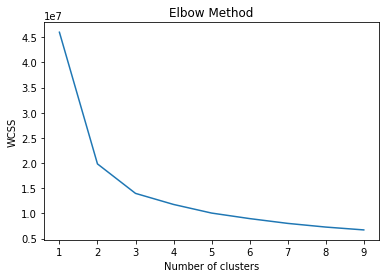

In [6]:
# --- split to test and train
df_cluster_train, df_cluster_test, _, _, = train_test_split(df_cluster, [1]*df_cluster.shape[0], test_size=0.33)   # ignoring y values for unsupervised

# --- fit model
attribute_summary_method_dict = {'payment_period_0':sum,'payment_period_1':sum,'payment_period_2':sum,'payment_period_3':sum,'num_weekly_services_utilized':np.mean,'weekly_consumption_hour':np.mean,'join_fee':np.mean,'num_ideal_streaming_services':np.mean,'age':np.mean,'monthly_price':np.mean,'preferred_genre_0':sum,'preferred_genre_comedy':sum,'preferred_genre_drama':sum,'preferred_genre_international':sum,'preferred_genre_other':sum,'preferred_genre_regional':sum,'intended_use_0':sum,'intended_use_access to exclusive content':sum,'intended_use_education':sum,'intended_use_expand international access':sum,'intended_use_expand regional access':sum,'intended_use_other':sum,'intended_use_replace OTT':sum,'intended_use_supplement OTT':sum,'male_TF_0':sum,'male_TF_伪':sum,'male_TF_真':sum,'attribution_survey_0':sum,'attribution_survey_affiliate':sum,'attribution_survey_amfm_radio':sum,'attribution_survey_direct_mail':sum,'attribution_survey_facebook':sum,'attribution_survey_facebook_organic':sum,'attribution_survey_other':sum,'attribution_survey_ott':sum,'attribution_survey_pinterest':sum,'attribution_survey_podcast':sum,'attribution_survey_public_radio':sum,'attribution_survey_referral':sum,'attribution_survey_search':sum,'attribution_survey_sirius xm':sum,'attribution_survey_social_organic':sum,'attribution_survey_tv':sum,'attribution_survey_youtube':sum,'package_type_0':sum,'package_type_base':sum,'package_type_economy':sum,'package_type_enhanced':sum,'current_sub_TF_伪':sum,'current_sub_TF_真':sum,'tier_0.0':sum,'tier_1.0':sum,'tier_2.0':sum,'tier_3.0':sum,'tier_4.0':sum,'tier_5.0':sum,'tier_6.0':sum,'tier_7.0':sum,'tier_8.0':sum,'attribution_technical_affiliate':sum,'attribution_technical_appstore':sum,'attribution_technical_bing':sum,'attribution_technical_bing_organic':sum,'attribution_technical_brand sem intent bing':sum,'attribution_technical_brand sem intent google':sum,'attribution_technical_content_greatist':sum,'attribution_technical_criteo':sum,'attribution_technical_direct_mail':sum,'attribution_technical_discovery':sum,'attribution_technical_display':sum,'attribution_technical_email':sum,'attribution_technical_email_blast':sum,'attribution_technical_facebook':sum,'attribution_technical_facebook_organic':sum,'attribution_technical_google_organic':sum,'attribution_technical_influencer':sum,'attribution_technical_internal':sum,'attribution_technical_organic':sum,'attribution_technical_other':sum,'attribution_technical_ott':sum,'attribution_technical_pinterest':sum,'attribution_technical_pinterest_organic':sum,'attribution_technical_playstore':sum,'attribution_technical_podcast':sum,'attribution_technical_quora':sum,'attribution_technical_referral':sum,'attribution_technical_samsung':sum,'attribution_technical_search':sum,'attribution_technical_tv':sum,'attribution_technical_twitter':sum,'attribution_technical_vod':sum,'attribution_technical_youtube':sum}
col_output_order = ['payment_period_0','payment_period_1','payment_period_2','payment_period_3','num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','age','join_fee','monthly_price','preferred_genre_0','preferred_genre_comedy','preferred_genre_drama','preferred_genre_international','preferred_genre_other','preferred_genre_regional','intended_use_0','intended_use_access to exclusive content','intended_use_education','intended_use_expand international access','intended_use_expand regional access','intended_use_other','intended_use_replace OTT','intended_use_supplement OTT','male_TF_0','male_TF_伪','male_TF_真','attribution_survey_0','attribution_survey_affiliate','attribution_survey_amfm_radio','attribution_survey_direct_mail','attribution_survey_facebook','attribution_survey_facebook_organic','attribution_survey_other','attribution_survey_ott','attribution_survey_pinterest','attribution_survey_podcast','attribution_survey_public_radio','attribution_survey_referral','attribution_survey_search','attribution_survey_sirius xm','attribution_survey_social_organic','attribution_survey_tv','attribution_survey_youtube','package_type_0','package_type_base','package_type_economy','package_type_enhanced','current_sub_TF_伪','current_sub_TF_真','tier_0.0','tier_1.0','tier_2.0','tier_3.0','tier_4.0','tier_5.0','tier_6.0','tier_7.0','tier_8.0','attribution_technical_affiliate','attribution_technical_appstore','attribution_technical_bing','attribution_technical_bing_organic','attribution_technical_brand sem intent bing','attribution_technical_brand sem intent google','attribution_technical_content_greatist','attribution_technical_criteo','attribution_technical_direct_mail','attribution_technical_discovery','attribution_technical_display','attribution_technical_email','attribution_technical_email_blast','attribution_technical_facebook','attribution_technical_facebook_organic','attribution_technical_google_organic','attribution_technical_influencer','attribution_technical_internal','attribution_technical_organic','attribution_technical_other','attribution_technical_ott','attribution_technical_pinterest','attribution_technical_pinterest_organic','attribution_technical_playstore','attribution_technical_podcast','attribution_technical_quora','attribution_technical_referral','attribution_technical_samsung','attribution_technical_search','attribution_technical_tv','attribution_technical_twitter','attribution_technical_vod','attribution_technical_youtube']

# training data
train_model, train_model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster_train.reindex())
# testing data
test_model, test_model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster_test.reindex())
# all data
model, model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster)

# --- run for various number of clusters
##### add the code to run the clustering algorithm for various numbers of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init=init_point_selection_method).fit(df_cluster)
    wcss.append(kmeans.inertia_)

# --- draw elbow plot
##### create an elbow plot for your numbers of clusters in previous step
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
genre_col_names = ['preferred_genre_0','preferred_genre_comedy','preferred_genre_drama','preferred_genre_international','preferred_genre_other','preferred_genre_regional']
df_cluster['preferred_genre'] = None
for t_col in genre_col_names:
    df_cluster.loc[df_cluster[t_col] == 1, 'preferred_genre'] = t_col.split('_')[2]

In [8]:
payment_period_col_names = ['payment_period_0','payment_period_1','payment_period_2','payment_period_3']
df_cluster['payment_period'] = None
for t_col in payment_period_col_names:
    df_cluster.loc[df_cluster[t_col] == 1, 'payment_period'] = t_col.split('_')[2]

In [9]:
intended_use_col_names = ['intended_use_0','intended_use_access to exclusive content','intended_use_education','intended_use_expand international access','intended_use_expand regional access','intended_use_other','intended_use_replace OTT','intended_use_supplement OTT']
df_cluster['intended_use'] = None
for t_col in intended_use_col_names:
    df_cluster.loc[df_cluster[t_col] == 1, 'intended_use'] = t_col.split('_')[2]

In [10]:
gender_col_names = ['male_TF_0','male_TF_伪','male_TF_真']
df_cluster['gender'] = None
for t_col in gender_col_names:
    df_cluster.loc[df_cluster[t_col] == 1, 'gender'] = t_col.split('_')[2]

In [11]:
attribution_survey_col_names = ['attribution_survey_0','attribution_survey_affiliate','attribution_survey_amfm_radio','attribution_survey_direct_mail','attribution_survey_facebook','attribution_survey_facebook_organic','attribution_survey_other','attribution_survey_ott','attribution_survey_pinterest','attribution_survey_podcast','attribution_survey_public_radio','attribution_survey_referral','attribution_survey_search','attribution_survey_sirius xm','attribution_survey_social_organic','attribution_survey_tv','attribution_survey_youtube']
df_cluster['attribution_survey'] = None
for t_col in attribution_survey_col_names:
    df_cluster.loc[df_cluster[t_col] == 1, 'attribution_survey'] = t_col.split('_')[2]

In [12]:
package_type_col_names = ['package_type_0','package_type_base','package_type_economy','package_type_enhanced']
df_cluster['package_type'] = None
for t_col in package_type_col_names:
    df_cluster.loc[df_cluster[t_col] == 1, 'package_type'] = t_col.split('_')[2]

In [13]:
current_sub_col_names = ['current_sub_TF_伪','current_sub_TF_真']
df_cluster['current_sub'] = None
for t_col in current_sub_col_names:
    df_cluster.loc[df_cluster[t_col] == 1, 'current_sub'] = t_col.split('_')[3]

In [14]:
tier_col_names = ['tier_0.0','tier_1.0','tier_2.0','tier_3.0','tier_4.0','tier_5.0','tier_6.0','tier_7.0','tier_8.0']
df_cluster['tier'] = None
for t_col in tier_col_names:
    df_cluster.loc[df_cluster[t_col] == 1, 'tier'] = t_col.split('_')[1][0]

In [15]:
attribution_technical_col_names = ['attribution_technical_affiliate','attribution_technical_appstore','attribution_technical_bing','attribution_technical_bing_organic','attribution_technical_brand sem intent bing','attribution_technical_brand sem intent google','attribution_technical_content_greatist','attribution_technical_criteo','attribution_technical_direct_mail','attribution_technical_discovery','attribution_technical_display','attribution_technical_email','attribution_technical_email_blast','attribution_technical_facebook','attribution_technical_facebook_organic','attribution_technical_google_organic','attribution_technical_influencer','attribution_technical_internal','attribution_technical_organic','attribution_technical_other','attribution_technical_ott','attribution_technical_pinterest','attribution_technical_pinterest_organic','attribution_technical_playstore','attribution_technical_podcast','attribution_technical_quora','attribution_technical_referral','attribution_technical_samsung','attribution_technical_search','attribution_technical_tv','attribution_technical_twitter','attribution_technical_vod','attribution_technical_youtube']
df_cluster['attribution_technical'] = None
for t_col in attribution_technical_col_names:
    df_cluster.loc[df_cluster[t_col] == 1, 'attribution_technical'] = t_col.split('_')[2]

In [16]:
df_cluster

,payment_period_0,payment_period_1,payment_period_2,payment_period_3,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,join_fee,age,monthly_price,preferred_genre_0,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_0,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_0,male_TF_伪,male_TF_真,attribution_survey_0,attribution_survey_affiliate,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,package_type_0,package_type_base,package_type_economy,package_type_enhanced,current_sub_TF_伪,current_sub_TF_真,tier_0.0,tier_1.0,tier_2.0,tier_3.0,tier_4.0,tier_5.0,tier_6.0,tier_7.0,tier_8.0,attribution_technical_affiliate,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,predict_cluster_kmeans,preferred_genre,payment_period,intended_use,gender,attribution_survey,package_type,current_sub,tier,attribution_technical
0,1,0,0,0,0.0,20.051667,0.0,0.0367,30.0,4.7343,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,drama,0,replace OTT,伪,tv,base,伪,7,search
1,0,1,0,0,2.0,20.051667,2.0,0.3303,61.0,4.7343,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,comedy,1,access to exclusive content,伪,search,base,真,8,bing
2,0,1,0,0,0.0,25.851492,0.0,0.6606,73.0,4.7343,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,comedy,1,access to exclusive content,伪,facebook,base,真,5,facebook
3,1,0,0,0,3.0,28.751405,2.0,0.3303,71.0,4.7343,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,drama,0,replace OTT,伪,facebook,economy,伪,7,search
4,0,1,0,0,0.0,37.451142,0.0,0.3303,24.0,4.7343,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,comedy,1,access to exclusive content,真,search,enhanced,真,6,search
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [17]:
df_cluster.count()

payment_period_0                191489
payment_period_1                191489
payment_period_2                191489
payment_period_3                191489
num_weekly_services_utilized    191489
                                 ...  
attribution_survey              191489
package_type                    191489
current_sub                     191489
tier                            191489
attribution_technical           191489
Length: 102, dtype: int64

In [18]:
df_cluster.iloc[0]

payment_period_0                     1
payment_period_1                     0
payment_period_2                     0
payment_period_3                     0
num_weekly_services_utilized         0
                                 ...  
attribution_survey                  tv
package_type                      base
current_sub                          伪
tier                                 7
attribution_technical           search
Name: 0, Length: 102, dtype: object

In [19]:
convert_TF = []
for i in range(0,191489):
    if df_cluster.iloc[i]['payment_period'] == '0' and df_cluster.iloc[i]['current_sub'] == '真':
        convert_TF.append('')
    elif df_cluster.iloc[i]['payment_period'] == '0' and df_cluster.iloc[i]['current_sub'] == '伪':
        convert_TF.append(False)
    else:
        convert_TF.append(True)

df_cluster['convert_TF'] = convert_TF
df_cluster   

,payment_period_0,payment_period_1,payment_period_2,payment_period_3,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,join_fee,age,monthly_price,preferred_genre_0,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_0,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_0,male_TF_伪,male_TF_真,attribution_survey_0,attribution_survey_affiliate,attribution_survey_amfm_radio,attribution_survey_direct_mail,attribution_survey_facebook,attribution_survey_facebook_organic,attribution_survey_other,attribution_survey_ott,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,package_type_0,package_type_base,package_type_economy,package_type_enhanced,current_sub_TF_伪,current_sub_TF_真,tier_0.0,tier_1.0,tier_2.0,tier_3.0,tier_4.0,tier_5.0,tier_6.0,tier_7.0,tier_8.0,attribution_technical_affiliate,attribution_technical_appstore,attribution_technical_bing,attribution_technical_bing_organic,attribution_technical_brand sem intent bing,attribution_technical_brand sem intent google,attribution_technical_content_greatist,attribution_technical_criteo,attribution_technical_direct_mail,attribution_technical_discovery,attribution_technical_display,attribution_technical_email,attribution_technical_email_blast,attribution_technical_facebook,attribution_technical_facebook_organic,attribution_technical_google_organic,attribution_technical_influencer,attribution_technical_internal,attribution_technical_organic,attribution_technical_other,attribution_technical_ott,attribution_technical_pinterest,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,predict_cluster_kmeans,preferred_genre,payment_period,intended_use,gender,attribution_survey,package_type,current_sub,tier,attribution_technical,convert_TF
0,1,0,0,0,0.0,20.051667,0.0,0.0367,30.0,4.7343,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,drama,0,replace OTT,伪,tv,base,伪,7,search,False
1,0,1,0,0,2.0,20.051667,2.0,0.3303,61.0,4.7343,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,comedy,1,access to exclusive content,伪,search,base,真,8,bing,True
2,0,1,0,0,0.0,25.851492,0.0,0.6606,73.0,4.7343,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,comedy,1,access to exclusive content,伪,facebook,base,真,5,facebook,True
3,1,0,0,0,3.0,28.751405,2.0,0.3303,71.0,4.7343,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,drama,0,replace OTT,伪,facebook,economy,伪,7,search,False
4,0,1,0,0,0.0,37.451142,0.0,0.3303,24.0,4.7343,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,comedy,1,access to exclusive content,真,search,enhanced,真,6,search,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [20]:
df_cluster.to_csv('final_project_clustering_output.csv')

In [31]:
import pandas as pd
import numpy as np

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pylab as plt

In [32]:
df = pd.read_csv('final_project_clustering_output.csv')

/Users/shuoxindai/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
import json
df = df[['convert_TF','attribution_survey','attribution_technical','tier','join_fee','monthly_price','payment_period','predict_cluster_kmeans']]
df = df.loc[df['attribution_survey'].isin(['bing', 'display', 'facebook', 'search', 'youtube']) | df['attribution_technical'].isin(['bing', 'display', 'facebook', 'search', 'youtube'])]
channel_spend = pd.read_csv('channel_spend_undergraduate.csv')
json.loads(channel_spend['spend'][0].replace("'", '"'))

{'bing': 300, 'display': 12, 'facebook': 9000, 'search': 13000, 'youtube': 90}

In [34]:
df

,convert_TF,attribution_survey,attribution_technical,tier,join_fee,monthly_price,payment_period,predict_cluster_kmeans
0,False,tv,search,7,0.0367,4.7343,0,1
1,True,search,bing,8,0.3303,4.7343,1,0
2,True,facebook,facebook,5,0.6606,4.7343,1,0
3,False,facebook,search,7,0.3303,4.7343,0,0
4,True,search,search,6,0.3303,4.7343,1,1
...,...,...,...,...,...,...,...,...
191476,False,search,facebook,0,0.0367,4.7343,0,0
191480,False,facebook,email,0,0.0000,4.7343,0,2
191481,True,facebook,brand sem intent google,0,0.0367,4.7343,1,2
191482,True,facebook,other,0,0.0367,4.7343,1,0


In [35]:
channel_spend_dict = {}
tier_list = ['tier1', 'tier2', 'tier3','tier4', 'tier5', 'tier6','tier7', 'tier8']
for i in range(8):
    channel_spend_dict[tier_list[i]] = json.loads(channel_spend['spend'][i].replace("'", '"'))
# channel_spend_dict
channel_spend = channel_spend_dict

In [36]:
channel_spend['tier1'].keys()

dict_keys(['bing', 'display', 'facebook', 'search', 'youtube'])

In [37]:
# ----- Set parameters -----
touch_col_prepend = 'touch'
direct_label = 'direct'
first_weight = 0.4
last_weight = 0.4
cred_col_post_pend = '_credit'
select_model_types = ['attribution_survey','attribution_technical']
write_to_file = True

# total spending for all 8 tier experiments
channel_spend['total'] = dict()
for t_name, t in channel_spend.items():
    if t_name != 'total':
        for c in t.keys():
            try:
                channel_spend['total'][c] = channel_spend['total'][c] + t[c]
            except KeyError:
                channel_spend['total'].update({c: 0})

In [38]:
channel_spend

{'tier1': {'bing': 300,
  'display': 12,
  'facebook': 9000,
  'search': 13000,
  'youtube': 90},
 'tier2': {'bing': 400,
  'display': 13,
  'facebook': 10500,
  'search': 18500,
  'youtube': 100},
 'tier3': {'bing': 900,
  'display': 19,
  'facebook': 11000,
  'search': 19000,
  'youtube': 130},
 'tier4': {'bing': 1000,
  'display': 20,
  'facebook': 13000,
  'search': 24000,
  'youtube': 180},
 'tier5': {'bing': 1100,
  'display': 29,
  'facebook': 14000,
  'search': 25000,
  'youtube': 550},
 'tier6': {'bing': 1300,
  'display': 31,
  'facebook': 16000,
  'search': 38000,
  'youtube': 900},
 'tier7': {'bing': 2100,
  'display': 94,
  'facebook': 17000,
  'search': 41000,
  'youtube': 2420},
 'tier8': {'bing': 3700,
  'display': 148,
  'facebook': 23000,
  'search': 44000,
  'youtube': 4360},
 'total': {'bing': 10500,
  'display': 354,
  'facebook': 104500,
  'search': 209500,
  'youtube': 8640}}

In [39]:
# ----- Format dataframe -----
# --- create credit columns
cred_col_names = ['bing_credit','display_credit','facebook_credit','search_credit','youtube_credit']
#df = pd.concat([df, pd.DataFrame(data=0, columns=cred_col_names, index=df.index)], axis=1, ignore_index=False)

In [40]:
df = df.reset_index()

In [41]:
df

,index,convert_TF,attribution_survey,attribution_technical,tier,join_fee,monthly_price,payment_period,predict_cluster_kmeans
0,0,False,tv,search,7,0.0367,4.7343,0,1
1,1,True,search,bing,8,0.3303,4.7343,1,0
2,2,True,facebook,facebook,5,0.6606,4.7343,1,0
3,3,False,facebook,search,7,0.3303,4.7343,0,0
4,4,True,search,search,6,0.3303,4.7343,1,1
...,...,...,...,...,...,...,...,...,...
131730,191476,False,search,facebook,0,0.0367,4.7343,0,0
131731,191480,False,facebook,email,0,0.0000,4.7343,0,2
131732,191481,True,facebook,brand sem intent google,0,0.0367,4.7343,1,2
131733,191482,True,facebook,other,0,0.0367,4.7343,1,0


In [42]:
cred_col_names

['bing_credit',
 'display_credit',
 'facebook_credit',
 'search_credit',
 'youtube_credit']

In [43]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

Counter(list(df['attribution_survey']))

Counter({'tv': 11014,
         'search': 8079,
         'facebook': 94315,
         'youtube': 3084,
         'podcast': 678,
         'other': 2628,
         'referral': 4741,
         'pinterest': 1198,
         'social': 2097,
         'affiliate': 726,
         'public': 1716,
         '0': 482,
         'sirius xm': 366,
         'ott': 426,
         'direct': 54,
         'amfm': 131})

In [44]:
Counter(list(df['attribution_technical']))

Counter({'search': 22072,
         'bing': 1499,
         'facebook': 65758,
         'display': 1391,
         'youtube': 906,
         'email': 15288,
         'affiliate': 4525,
         'organic': 5474,
         'google': 3475,
         'brand sem intent google': 5861,
         'brand sem intent bing': 673,
         'discovery': 1505,
         'pinterest': 1173,
         'referral': 674,
         'other': 717,
         'quora': 56,
         'internal': 480,
         'podcast': 53,
         'samsung': 27,
         'influencer': 19,
         'criteo': 24,
         'vod': 34,
         'direct': 22,
         'appstore': 15,
         'playstore': 4,
         'ott': 8,
         'twitter': 1,
         'content': 1})

In [45]:
df[df.convert_TF==True].attribution_survey.value_counts()

facebook     47562
search        5796
referral      4322
tv            4216
youtube       2360
other         1896
social        1562
public        1222
pinterest      924
podcast        555
affiliate      516
ott            353
sirius xm      275
0              259
amfm            88
direct          34
Name: attribution_survey, dtype: int64

In [46]:
df = df[df.tier != 0]

In [47]:
df['convert_TF'] = df['convert_TF'].astype(bool)

/Users/shuoxindai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df

,index,convert_TF,attribution_survey,attribution_technical,tier,join_fee,monthly_price,payment_period,predict_cluster_kmeans
0,0,False,tv,search,7,0.0367,4.7343,0,1
1,1,True,search,bing,8,0.3303,4.7343,1,0
2,2,True,facebook,facebook,5,0.6606,4.7343,1,0
3,3,False,facebook,search,7,0.3303,4.7343,0,0
4,4,True,search,search,6,0.3303,4.7343,1,1
...,...,...,...,...,...,...,...,...,...
78594,78594,False,facebook,facebook,4,0.0367,4.7343,0,2
78595,78595,False,facebook,facebook,4,0.0367,4.7343,0,2
78596,78596,True,facebook,youtube,7,0.0367,4.7343,1,1
78597,78597,True,facebook,facebook,8,0.3303,4.7343,1,1


In [49]:
df.loc[df['convert_TF']==True]

,index,convert_TF,attribution_survey,attribution_technical,tier,join_fee,monthly_price,payment_period,predict_cluster_kmeans
1,1,True,search,bing,8,0.3303,4.7343,1,0
2,2,True,facebook,facebook,5,0.6606,4.7343,1,0
4,4,True,search,search,6,0.3303,4.7343,1,1
6,6,True,search,search,4,0.0367,4.7343,2,1
7,7,True,facebook,facebook,3,0.0367,4.7343,1,2
...,...,...,...,...,...,...,...,...,...
78590,78590,True,referral,search,8,0.6606,4.7343,1,2
78593,78593,True,facebook,facebook,2,0.0367,4.7343,2,0
78596,78596,True,facebook,youtube,7,0.0367,4.7343,1,1
78597,78597,True,facebook,facebook,8,0.3303,4.7343,1,1


In [50]:
def assign_credit(t_row, cred_col_names_f, cred_col_post_pend_f, model_type_f, first_weight_f=0.5, last_weight_f=0.5):
    # function assigns a credit to each relevant channel based on user specified model type, e.g. "last_touch_point", "first_touch_point", etc.
    t_dict = dict(zip(cred_col_names_f, [0]*len(cred_col_names_f)))

    if model_type_f == 'attribution_survey':
        if t_row['attribution_survey'] == 'bing' or t_row['attribution_survey'] == 'display'or t_row['attribution_survey'] ==  'facebook' or t_row['attribution_survey'] == 'search' or t_row['attribution_survey'] == 'youtube':
            t_dict.update({t_row['attribution_survey'] + cred_col_post_pend_f: 1})
        return t_dict
    if model_type_f == 'attribution_technical':
        if t_row['attribution_technical'] == 'bing' or t_row['attribution_survey'] == 'display'or t_row['attribution_survey'] ==  'facebook' or t_row['attribution_survey'] == 'search' or t_row['attribution_survey'] == 'youtube':
            t_dict.update({t_row['attribution_technical'] + cred_col_post_pend_f: 1})
        return t_dict
    
def get_attribution_by_channel(df_f, credit_col_postpend_f):
    allocated_conversions = df_f[cred_col_names].sum()
    print(allocated_conversions)
    n_allocated_conversions = df_f[cred_col_names].sum().sum()
    print(n_allocated_conversions)
    n_total_conversions = df_f['convert_TF'].sum()
    channel_allocation_f = pd.Series(dict(zip([x.split(credit_col_postpend_f)[0] for x in allocated_conversions.keys()], list(allocated_conversions.array))))
    return channel_allocation_f


def calc_avg_CAC(channel_allocation_f, channel_spend_f):
    t_df = pd.DataFrame(channel_allocation_f)
    t_df.columns = ['channel_allocation']
    for t_ind, _ in t_df.iterrows():
        t_df.loc[t_ind, 'channel_spend'] = channel_spend_f[t_ind]

    t_df['CAC'] = t_df['channel_spend'] / t_df['channel_allocation']
    t_df['CAC'].replace(np.inf, 0, inplace=True)
    return t_df

def calc_marginal_CAC(n_conversions_low_tier, spend_low_tier, n_conversions_high_tier, spend_high_tier):
    ##### fill in this code to create the three variables in output dictionary
    marginal_conversions = n_conversions_high_tier - n_conversions_low_tier
    marginal_spend = spend_high_tier - spend_low_tier
    marginal_CAC = marginal_spend/marginal_conversions
    return {'marginal_conversions': marginal_conversions, 'marginal_spend': marginal_spend,
            'marginal_CAC': marginal_CAC}

In [51]:
df.convert_TF = df.convert_TF.fillna(False)
# df = df.sample(n=5000)
# ----- RUN MODELS -----
CAC_dfs = dict()
for model_type in select_model_types:
    print('Processing model %s' % model_type)

    # ----- Run attribution model -----
    print('Running attribution model')
    df_convert = df.loc[df['convert_TF']==True] # only run calculation for conversion rows
    info_to_add = list()
    for t_ind, t_row in df_convert.iterrows():
        t_credit_dict = assign_credit(t_row, cred_col_names, cred_col_post_pend, model_type, first_weight, last_weight)
        info_to_add.append(t_credit_dict)
    df_convert = pd.concat([df_convert.reset_index(drop=True), pd.DataFrame(info_to_add).reset_index(drop=True)], axis=1)
    #df.loc[t_ind, list(t_credit_dict.keys())] = list(t_credit_dict.values())  # add credit to original dataframe

    # ----- Calculate CAC -----
    print('Calculating average and marginal CAC')
    # --- Average CAC ---
    channel_allocation = get_attribution_by_channel(df_convert, credit_col_postpend_f='_credit')
    df_CAC = calc_avg_CAC(channel_allocation, channel_spend['total'])
    
    # --- Marginal CAC ---
    credit_cols = [x for x in df_convert.columns if x.find('credit') > -1]
    df_CAC = pd.DataFrame(index=[x.split('_credit')[0] for x in credit_cols])
    base_col_names = ['marginal_conversions', 'marginal_spend', 'marginal_CAC']

    df_tier_sum = df_convert[['tier']+credit_cols].groupby(['tier']).sum()
    df_tier_sum.columns = [x.split('_credit')[0] for x in df_tier_sum.columns]
    for t_tier in df_tier_sum.index:
        for t_channel in df_CAC.index:
            if t_tier > 1:
                n_conversions_low_tier = df_tier_sum.loc[t_tier - 1, t_channel]
                spend_low_tier = channel_spend['tier' + str(t_tier - 1)][t_channel]
                n_conversions_high_tier = df_tier_sum.loc[t_tier, t_channel]
                spend_high_tier = channel_spend['tier' + str(t_tier)][t_channel]
            else:
                n_conversions_low_tier = 0
                spend_low_tier = 0
                n_conversions_high_tier = df_tier_sum.loc[t_tier, t_channel]
                spend_high_tier = channel_spend['tier' + str(t_tier)][t_channel]

            t_df_CAC_colnames = [x + '_t' + str(t_tier) for x in base_col_names]
            for i in t_df_CAC_colnames:
                if i not in list(df_CAC.columns):
                    df_CAC[i] = float('nan')
            
            t_marginal_dict = calc_marginal_CAC(n_conversions_low_tier, spend_low_tier, n_conversions_high_tier, spend_high_tier)
            df_CAC.loc[t_channel, t_df_CAC_colnames] = [t_marginal_dict[x] for x in base_col_names]
    CAC_dfs.update({model_type: df_CAC})

Processing model attribution_survey
Running attribution model
Calculating average and marginal CAC
bing_credit            0
display_credit         0
facebook_credit    26692
search_credit       3235
youtube_credit       796
dtype: int64
30723
Processing model attribution_technical
Running attribution model


/Users/shuoxindai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in long_scalars


Calculating average and marginal CAC
bing_credit          501
display_credit       385
facebook_credit    23114
search_credit       6456
youtube_credit       515
dtype: int64
30971


In [77]:
CAC_dfs

{'attribution_survey':           marginal_conversions_t1  marginal_spend_t1  marginal_CAC_t1  \
 bing                          0.0              300.0              inf   
 display                       0.0               12.0              inf   
 facebook                   1521.0             9000.0         5.917160   
 search                      155.0            13000.0        83.870968   
 youtube                      12.0               90.0         7.500000   
 
           marginal_conversions_t2  marginal_spend_t2  marginal_CAC_t2  \
 bing                          0.0              100.0              inf   
 display                       0.0                1.0              inf   
 facebook                    980.0             1500.0         1.530612   
 search                      107.0             5500.0        51.401869   
 youtube                       9.0               10.0         1.111111   
 
           marginal_conversions_t3  marginal_spend_t3  marginal_CAC_t3  \
 bing       

In [52]:
# print implied CAC
for m in CAC_dfs.keys():
    print('\n%s attribution model implied CAC:' % m)
    print(CAC_dfs[m][['marginal_CAC_t1', 'marginal_CAC_t2', 'marginal_CAC_t3','marginal_CAC_t4', 'marginal_CAC_t5', 'marginal_CAC_t6','marginal_CAC_t7', 'marginal_CAC_t8']])


attribution_survey attribution model implied CAC:
          marginal_CAC_t1  marginal_CAC_t2  marginal_CAC_t3  marginal_CAC_t4  \
bing                  inf              inf              inf              inf   
display               inf              inf              inf              inf   
facebook         5.917160         1.530612       -55.555556         2.288330   
search          83.870968        51.401869         7.575758        81.967213   
youtube          7.500000         1.111111         7.500000         3.333333   

          marginal_CAC_t5  marginal_CAC_t6  marginal_CAC_t7  marginal_CAC_t8  
bing                  inf              inf              inf              inf  
display               inf              inf              inf              inf  
facebook        -3.246753         2.224694         3.030303         4.905969  
search        -500.000000        80.246914      -157.894737        28.571429  
youtube         16.086957        17.500000        12.258065        14.057

In [62]:
CAC_dfs['attribution_survey'].loc[['bing', 'display', 'facebook', 'search', 'youtube']]

,marginal_conversions_t1,marginal_spend_t1,marginal_CAC_t1,marginal_conversions_t2,marginal_spend_t2,marginal_CAC_t2,marginal_conversions_t3,marginal_spend_t3,marginal_CAC_t3,marginal_conversions_t4,...,marginal_CAC_t5,marginal_conversions_t6,marginal_spend_t6,marginal_CAC_t6,marginal_conversions_t7,marginal_spend_t7,marginal_CAC_t7,marginal_conversions_t8,marginal_spend_t8,marginal_CAC_t8
bing,0.0,300.0,inf,0.0,100.0,inf,0.0,500.0,inf,0.0,...,inf,0.0,200.0,inf,0.0,800.0,inf,0.0,1600.0,inf
display,0.0,12.0,inf,0.0,1.0,inf,0.0,6.0,inf,0.0,...,inf,0.0,2.0,inf,0.0,63.0,inf,0.0,54.0,inf
facebook,1521.0,9000.0,5.917160,980.0,1500.0,1.530612,-9.0,500.0,-55.555556,874.0,...,-3.246753,899.0,2000.0,2.224694,330.0,1000.0,3.030303,1223.0,6000.0,4.905969
search,155.0,13000.0,83.870968,107.0,5500.0,51.401869,66.0,500.0,7.575758,61.0,...,-500.000000,162.0,13000.0,80.246914,-19.0,3000.0,-157.894737,105.0,3000.0,28.571429
youtube,12.0,90.0,7.500000,9.0,10.0,1.111111,4.0,30.0,7.500000,15.0,...,16.086957,20.0,350.0,17.500000,124.0,1520.0,12.258065,138.0,1940.0,14.057971


In [63]:
CAC_dfs['attribution_technical'].loc[['bing', 'display', 'facebook', 'search', 'youtube']]

,marginal_conversions_t1,marginal_spend_t1,marginal_CAC_t1,marginal_conversions_t2,marginal_spend_t2,marginal_CAC_t2,marginal_conversions_t3,marginal_spend_t3,marginal_CAC_t3,marginal_conversions_t4,...,marginal_CAC_t5,marginal_conversions_t6,marginal_spend_t6,marginal_CAC_t6,marginal_conversions_t7,marginal_spend_t7,marginal_CAC_t7,marginal_conversions_t8,marginal_spend_t8,marginal_CAC_t8
bing,13.0,300.0,23.076923,12.0,100.0,8.333333,4.0,500.0,125.000000,22.0,...,50.000000,6.0,200.0,33.333333,34.0,800.0,23.529412,85.0,1600.0,18.823529
display,4.0,12.0,3.000000,-2.0,1.0,-0.500000,8.0,6.0,0.750000,13.0,...,0.900000,-3.0,2.0,-0.666667,81.0,63.0,0.777778,61.0,54.0,0.885246
facebook,1445.0,9000.0,6.228374,758.0,1500.0,1.978892,-9.0,500.0,-55.555556,734.0,...,-2.645503,783.0,2000.0,2.554278,312.0,1000.0,3.205128,1171.0,6000.0,5.123826
search,235.0,13000.0,55.319149,327.0,5500.0,16.819572,58.0,500.0,8.620690,189.0,...,17.543860,278.0,13000.0,46.762590,-57.0,3000.0,-52.631579,46.0,3000.0,65.217391
youtube,1.0,90.0,90.000000,0.0,10.0,inf,4.0,30.0,7.500000,4.0,...,15.416667,11.0,350.0,31.818182,96.0,1520.0,15.833333,142.0,1940.0,13.661972


In [64]:
# write marginal CAC output
if write_to_file:
    for key, value in CAC_dfs.items():
        with open(key + '_model_marginal_implied_CAC.csv', 'w') as f:
            value.to_csv(f)

In [89]:
df_technical = pd.read_csv('attribution_technical_model_marginal_implied_CAC.csv')

In [90]:
df_survey = pd.read_csv('attribution_survey_model_marginal_implied_CAC.csv')

In [91]:
df_convert[['join_fee', 'payment_period','monthly_price']] = df_convert[['join_fee', 'payment_period','monthly_price']].apply(pd.to_numeric)

In [92]:
df

,index,convert_TF,attribution_survey,attribution_technical,tier,join_fee,monthly_price,payment_period,predict_cluster_kmeans,revenue
0,0,False,tv,search,7,0.0367,4.7343,0,1,0.0367
1,1,True,search,bing,8,0.3303,4.7343,1,0,19.2675
2,2,True,facebook,facebook,5,0.6606,4.7343,1,0,19.5978
3,3,False,facebook,search,7,0.3303,4.7343,0,0,0.3303
4,4,True,search,search,6,0.3303,4.7343,1,1,19.2675
...,...,...,...,...,...,...,...,...,...,...
78594,78594,False,facebook,facebook,4,0.0367,4.7343,0,2,0.0367
78595,78595,False,facebook,facebook,4,0.0367,4.7343,0,2,0.0367
78596,78596,True,facebook,youtube,7,0.0367,4.7343,1,1,18.9739
78597,78597,True,facebook,facebook,8,0.3303,4.7343,1,1,19.2675


In [99]:
df_convert['revenue'] = df_convert['join_fee']+df_convert['payment_period']*4*df_convert['monthly_price']

In [100]:
df_convert

,index,convert_TF,attribution_survey,attribution_technical,tier,join_fee,monthly_price,payment_period,predict_cluster_kmeans,bing_credit,display_credit,facebook_credit,search_credit,youtube_credit,marginal_cac_technical,marginal_cac_survey,revenue
0,1,True,search,bing,8,0.3303,4.7343,1,0,1,0,0,0,0,18.823529,28.571429,19.2675
1,2,True,facebook,facebook,5,0.6606,4.7343,1,0,0,0,1,0,0,-2.645503,-3.246753,19.5978
2,4,True,search,search,6,0.3303,4.7343,1,1,0,0,0,1,0,46.762590,80.246914,19.2675
3,6,True,search,search,4,0.0367,4.7343,2,1,0,0,0,1,0,26.455026,81.967213,37.9111
4,7,True,facebook,facebook,3,0.0367,4.7343,1,2,0,0,1,0,0,-55.555556,-55.555556,18.9739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44646,78590,True,referral,search,8,0.6606,4.7343,1,2,0,0,0,0,0,65.217391,0.000000,19.5978
44647,78593,True,facebook,facebook,2,0.0367,4.7343,2,0,0,0,1,0,0,1.978892,1.530612,37.9111
44648,78596,True,facebook,youtube,7,0.0367,4.7343,1,1,0,0,0,0,1,15.833333,3.030303,18.9739
44649,78597,True,facebook,facebook,8,0.3303,4.7343,1,1,0,0,1,0,0,5.123826,4.905969,19.2675


In [101]:
df_technical

,Unnamed: 0,marginal_conversions_t1,marginal_spend_t1,marginal_CAC_t1,marginal_conversions_t2,marginal_spend_t2,marginal_CAC_t2,marginal_conversions_t3,marginal_spend_t3,marginal_CAC_t3,...,marginal_CAC_t5,marginal_conversions_t6,marginal_spend_t6,marginal_CAC_t6,marginal_conversions_t7,marginal_spend_t7,marginal_CAC_t7,marginal_conversions_t8,marginal_spend_t8,marginal_CAC_t8
0,bing,13.0,300.0,23.076923,12.0,100.0,8.333333,4.0,500.0,125.000000,...,50.000000,6.0,200.0,33.333333,34.0,800.0,23.529412,85.0,1600.0,18.823529
1,display,4.0,12.0,3.000000,-2.0,1.0,-0.500000,8.0,6.0,0.750000,...,0.900000,-3.0,2.0,-0.666667,81.0,63.0,0.777778,61.0,54.0,0.885246
2,facebook,1445.0,9000.0,6.228374,758.0,1500.0,1.978892,-9.0,500.0,-55.555556,...,-2.645503,783.0,2000.0,2.554278,312.0,1000.0,3.205128,1171.0,6000.0,5.123826
3,search,235.0,13000.0,55.319149,327.0,5500.0,16.819572,58.0,500.0,8.620690,...,17.543860,278.0,13000.0,46.762590,-57.0,3000.0,-52.631579,46.0,3000.0,65.217391
4,youtube,1.0,90.0,90.000000,0.0,10.0,inf,4.0,30.0,7.500000,...,15.416667,11.0,350.0,31.818182,96.0,1520.0,15.833333,142.0,1940.0,13.661972


In [102]:
df_convert.loc[1,'tier']

5

In [103]:
cac_survey = []
cac_technical =[]
for i in range(len(df_convert)):
    if df_convert.loc[i,'attribution_technical'] == 'bing':
        tier = df_convert.loc[i,'tier']
        cac_technical.append(CAC_dfs['attribution_technical'].loc['bing','marginal_CAC_t'+str(tier)])
    elif df_convert.loc[i,'attribution_technical'] == 'youtube':
        tier = df_convert.loc[i,'tier']
        cac_technical.append(CAC_dfs['attribution_technical'].loc['youtube','marginal_CAC_t'+str(tier)])
    elif df_convert.loc[i,'attribution_technical'] == 'facebook':
        tier = df_convert.loc[i,'tier']
        cac_technical.append(CAC_dfs['attribution_technical'].loc['facebook','marginal_CAC_t'+str(tier)])
    elif df_convert.loc[i,'attribution_technical'] == 'search':
        tier = df_convert.loc[i,'tier']
        cac_technical.append(CAC_dfs['attribution_technical'].loc['search','marginal_CAC_t'+str(tier)])
    elif df_convert.loc[i,'attribution_technical'] == 'display':
        tier = df_convert.loc[i,'tier']
        cac_technical.append(CAC_dfs['attribution_technical'].loc['display','marginal_CAC_t'+str(tier)])
    else:
        cac_technical.append(0)

for i in range(len(df_convert)):
    if df_convert.loc[i,'attribution_survey'] == 'bing':
        tier = df_convert.loc[i,'tier']
        cac_survey.append(CAC_dfs['attribution_survey'].loc['bing','marginal_CAC_t'+str(tier)])
    elif df_convert.loc[i,'attribution_survey'] == 'youtube':
        tier = df_convert.loc[i,'tier']
        cac_survey.append(CAC_dfs['attribution_survey'].loc['youtube','marginal_CAC_t'+str(tier)])
    elif df_convert.loc[i,'attribution_survey'] == 'facebook':
        tier = df_convert.loc[i,'tier']
        cac_survey.append(CAC_dfs['attribution_survey'].loc['facebook','marginal_CAC_t'+str(tier)])
    elif df_convert.loc[i,'attribution_survey'] == 'search':
        tier = df_convert.loc[i,'tier']
        cac_survey.append(CAC_dfs['attribution_survey'].loc['search','marginal_CAC_t'+str(tier)])
    elif df_convert.loc[i,'attribution_survey'] == 'display':
        tier = df_convert.loc[i,'tier']
        cac_survey.append(CAC_dfs['attribution_survey'].loc['display','marginal_CAC_t'+str(tier)])
    else:
        cac_survey.append(0)

df_convert['marginal_cac_technical'] = cac_technical
df_convert['marginal_cac_survey'] = cac_survey

In [105]:
df_convert

,index,convert_TF,attribution_survey,attribution_technical,tier,join_fee,monthly_price,payment_period,predict_cluster_kmeans,bing_credit,display_credit,facebook_credit,search_credit,youtube_credit,marginal_cac_technical,marginal_cac_survey,revenue
0,1,True,search,bing,8,0.3303,4.7343,1,0,1,0,0,0,0,18.823529,28.571429,19.2675
1,2,True,facebook,facebook,5,0.6606,4.7343,1,0,0,0,1,0,0,-2.645503,-3.246753,19.5978
2,4,True,search,search,6,0.3303,4.7343,1,1,0,0,0,1,0,46.762590,80.246914,19.2675
3,6,True,search,search,4,0.0367,4.7343,2,1,0,0,0,1,0,26.455026,81.967213,37.9111
4,7,True,facebook,facebook,3,0.0367,4.7343,1,2,0,0,1,0,0,-55.555556,-55.555556,18.9739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44646,78590,True,referral,search,8,0.6606,4.7343,1,2,0,0,0,0,0,65.217391,0.000000,19.5978
44647,78593,True,facebook,facebook,2,0.0367,4.7343,2,0,0,0,1,0,0,1.978892,1.530612,37.9111
44648,78596,True,facebook,youtube,7,0.0367,4.7343,1,1,0,0,0,0,1,15.833333,3.030303,18.9739
44649,78597,True,facebook,facebook,8,0.3303,4.7343,1,1,0,0,1,0,0,5.123826,4.905969,19.2675


In [107]:
df_convert['CLV_technical'] = df_convert['revenue']-df_convert['marginal_cac_technical']
df_convert['CLV_survey'] = df_convert['revenue']-df_convert['marginal_cac_survey']
df_convert['CLV/CAC_ratio_technical'] = df_convert['CLV_technical']/df_convert['marginal_cac_technical']
df_convert['CLV/CAC_ratio_survey'] = df_convert['CLV_survey']/df_convert['marginal_cac_survey']

In [108]:
df_convert

,index,convert_TF,attribution_survey,attribution_technical,tier,join_fee,monthly_price,payment_period,predict_cluster_kmeans,bing_credit,...,facebook_credit,search_credit,youtube_credit,marginal_cac_technical,marginal_cac_survey,revenue,CLV_technical,CLV_survey,CLV/CAC_ratio_technical,CLV/CAC_ratio_survey
0,1,True,search,bing,8,0.3303,4.7343,1,0,1,...,0,0,0,18.823529,28.571429,19.2675,0.443971,-9.303929,0.023586,-0.325637
1,2,True,facebook,facebook,5,0.6606,4.7343,1,0,0,...,1,0,0,-2.645503,-3.246753,19.5978,22.243303,22.844553,-8.407968,-7.036122
2,4,True,search,search,6,0.3303,4.7343,1,1,0,...,0,1,0,46.762590,80.246914,19.2675,-27.495090,-60.979414,-0.587972,-0.759897
3,6,True,search,search,4,0.0367,4.7343,2,1,0,...,0,1,0,26.455026,81.967213,37.9111,11.456074,-44.056113,0.433040,-0.537485
4,7,True,facebook,facebook,3,0.0367,4.7343,1,2,0,...,1,0,0,-55.555556,-55.555556,18.9739,74.529456,74.529456,-1.341530,-1.341530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44646,78590,True,referral,search,8,0.6606,4.7343,1,2,0,...,0,0,0,65.217391,0.000000,19.5978,-45.619591,19.597800,-0.699500,inf
44647,78593,True,facebook,facebook,2,0.0367,4.7343,2,0,0,...,1,0,0,1.978892,1.530612,37.9111,35.932208,36.380488,18.157743,23.768585
44648,78596,True,facebook,youtube,7,0.0367,4.7343,1,1,0,...,0,0,1,15.833333,3.030303,18.9739,3.140567,15.943597,0.198352,5.261387
44649,78597,True,facebook,facebook,8,0.3303,4.7343,1,1,0,...,1,0,0,5.123826,4.905969,19.2675,14.143674,14.361531,2.760374,2.927359


In [110]:
df_convert.to_csv('clv_cac_analysis.csv')